In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
sorvete = pd.read_csv(r'dataset/IceCreamData.csv')
sorvete

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


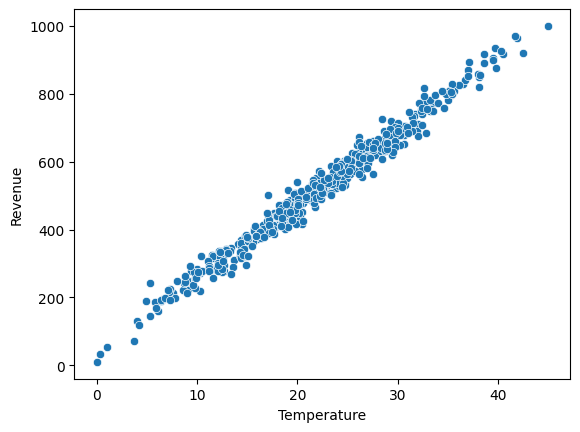

In [3]:
sea.scatterplot(sorvete, x='Temperature', y='Revenue')
plt.show()

In [4]:
from statsmodels import api, formula

In [5]:
sorvete['Revenue']
model = api.formula.ols('Revenue~Temperature', sorvete)
res   = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.404e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:02:18   Log-Likelihood:                -2318.1
No. Observations:                 500   AIC:                             4640.
Df Residuals:                     498   BIC:                             4649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.8313      3.272     13.703      

Intercept      44.831267
Temperature    21.443626
dtype: float64

In [9]:
table = api.stats.anova_lm(res)
table

,df,sum_sq,mean_sq,F,PR(>F)
Temperature,1.0,1.504110e+07,1.504110e+07,24042.723946,0.0
Residual,498.0,3.115482e+05,6.255988e+02,NaN,NaN


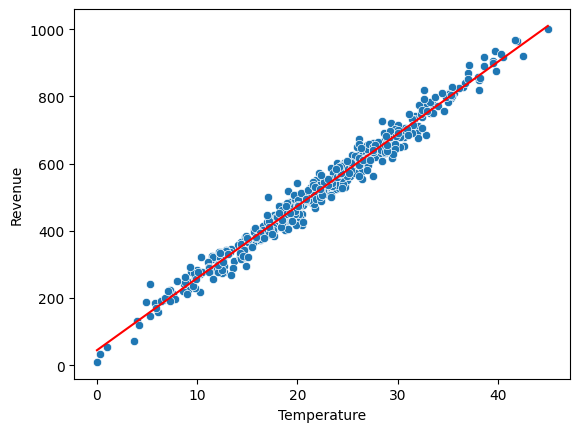

In [12]:
r = lambda x: 44.8313 + 21.4436*x

sea.scatterplot(sorvete, x='Temperature', y='Revenue')
sea.lineplot(x=sorvete['Temperature'] , y=r(sorvete['Temperature']), c='red')
plt.show()

In [13]:
sorvete.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = sorvete['Temperature'].values.reshape(-1, 1)
y = sorvete['Revenue'].values.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
rl = LinearRegression()
rl.fit(xtrain, ytrain)

LinearRegression()

In [37]:
rl.coef_, rl.intercept_, res.params

(array([[21.37416109]]),
 array([46.91078475]),
 Intercept      44.831267
 Temperature    21.443626
 dtype: float64)

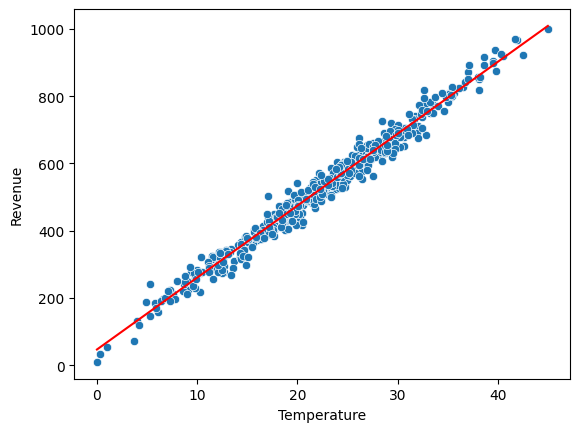

In [39]:
r = lambda x: rl.intercept_[0]+ rl.coef_[0]*x

sea.scatterplot(sorvete, x='Temperature', y='Revenue')
sea.lineplot(x=sorvete['Temperature'] , y=r(sorvete['Temperature']), c='red')
plt.show()

In [52]:
np.concatenate([rl.predict(xtest), ytest], axis=1)[:10]

array([[681.81277787, 659.8732869 ],
       [632.03701584, 623.2487008 ],
       [559.56236196, 559.1358692 ],
       [498.84704992, 497.7523178 ],
       [615.35775421, 627.9018411 ],
       [304.73607431, 300.9322734 ],
       [285.81302849, 278.7319615 ],
       [315.61634521, 319.3494624 ],
       [506.20253292, 483.4897686 ],
       [685.57013845, 683.5447809 ]])